In [13]:
import scipy
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
from torchvision.datasets import SVHN
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split
%matplotlib inline

# Pre-processing techniques to try:
 - [X] Converting to grayscale
 - [ ] Normalizing intensity through mean subtraction
 - [ ] Local contrast normalization
 - [ ] Global contrast normalization

In [65]:
def transform_selector(transform_type):
    if transform_type == "grayscale":
        transform = transforms.Compose([transforms.Grayscale(),
                                        transforms.ToTensor(),
                                        transforms.Normalize((0.4516),(0.1993))])
    if transform_type == "normalize_intensity":
          transform = transforms.Compose([transforms.ToTensor(),
                                          transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])
    if transform_type == "final":
        transform = transforms.Compose([transforms.RandomHorizontalFlip(),
                                        transforms.RandomVerticalFlip(),
                                        transforms.RandomRotation(30),
                                        transforms.Grayscale(),
                                        transforms.ToTensor(),
                                        transforms.Normalize((0.4516),(0.1993))])
#     if transform_type == "local_contrast_normalization":
        
#     if transform_type == "global_contrast_normalization":
    return transform

In [1]:
# loader = DataLoader(train_set, batch_size=len(train_set), num_workers=1)
# data = next(iter(loader))
# data[0].mean(), data[0].std()


#Consider comparing above approach to find means and stfs, with this:
# means = []
# stds = []
# for img in subset(dataset):
#     means.append(torch.mean(img))
#     stds.append(torch.std(img))

# mean = torch.mean(torch.tensor(means))
# std = torch.mean(torch.tensor(stds))

In [59]:
def view_preprocessed_images(transform_type):
    train_set = torchvision.datasets.SVHN("/home/jupyter/pytorch_datasets/train", split = "train", download = False, transform = transform_selector(transform_type), target_transform = None)
    validation_set = torchvision.datasets.SVHN("/home/jupyter/pytorch_datasets/test", split = "test", download = False, transform = transform_selector(transform_type), target_transform = None)
    extra_set = torchvision.datasets.SVHN("/home/jupyter/pytorch_datasets/extra", split = "extra", download = False, transform = transform_selector(transform_type), target_transform = None)

    batch_size = 64

    train_loader = DataLoader(train_set, batch_size, shuffle=True, num_workers=4, pin_memory=True)
    val_loader = DataLoader(validation_set, batch_size, num_workers=4, pin_memory=True)

    for images, _ in train_loader:
        print('images.shape:', images.shape)
        plt.figure(figsize=(16,8))
        plt.axis('off')
        plt.imshow(make_grid(images, nrow=16).permute((1, 2, 0)))
        break

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


images.shape: torch.Size([64, 1, 32, 32])


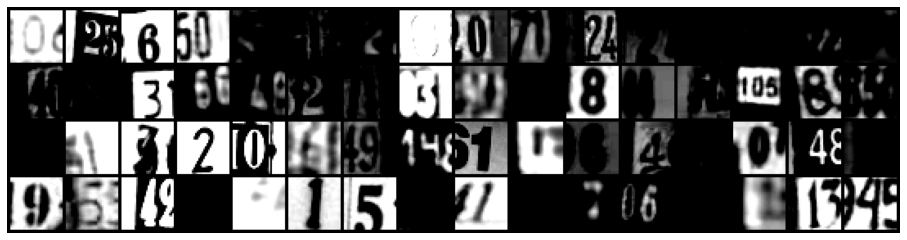

In [60]:
view_preprocessed_images("grayscale")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


images.shape: torch.Size([64, 3, 32, 32])


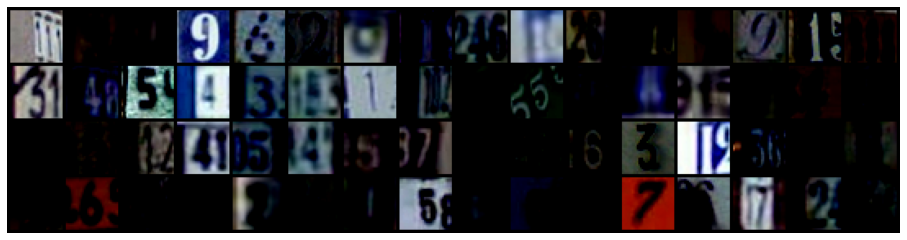

In [50]:
view_preprocessed_images("normalize_intensity")

# Other normalization techniques will be explored later if time permits

# For now, we will use the "final" transforms, based on our investigation of the test set.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


images.shape: torch.Size([64, 1, 32, 32])


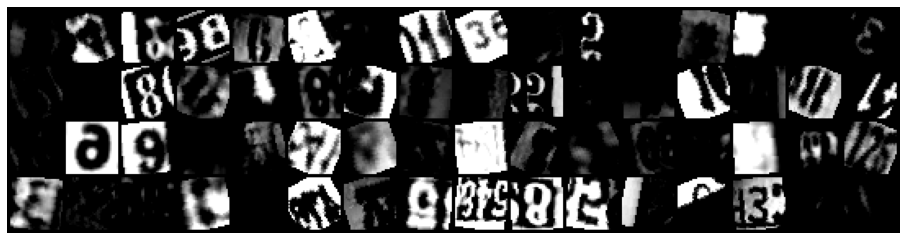

In [66]:
view_preprocessed_images("final")